In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
glasses = pd.read_excel("/content/glasses.xlsx",sheet_name="glass")
glasses

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glasses['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [5]:
glasses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glasses.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
209,False
210,False
211,False
212,False


In [7]:
glasses.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [8]:
glasses.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
glasses['Type'].mean()

np.float64(2.7803738317757007)

In [10]:
x = glasses.iloc[:, :8]    # features
y = glasses.iloc[:, 9]     # target (Type)


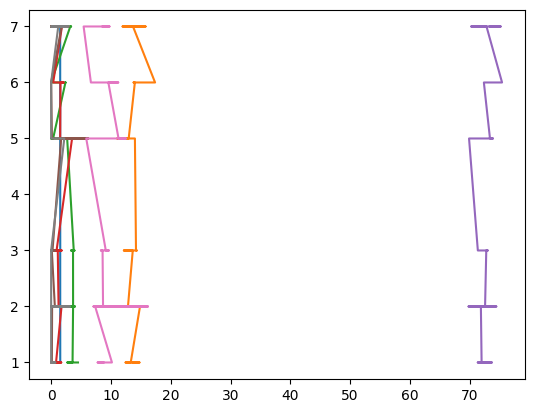

In [11]:
plt.plot(x,y,data=glasses)

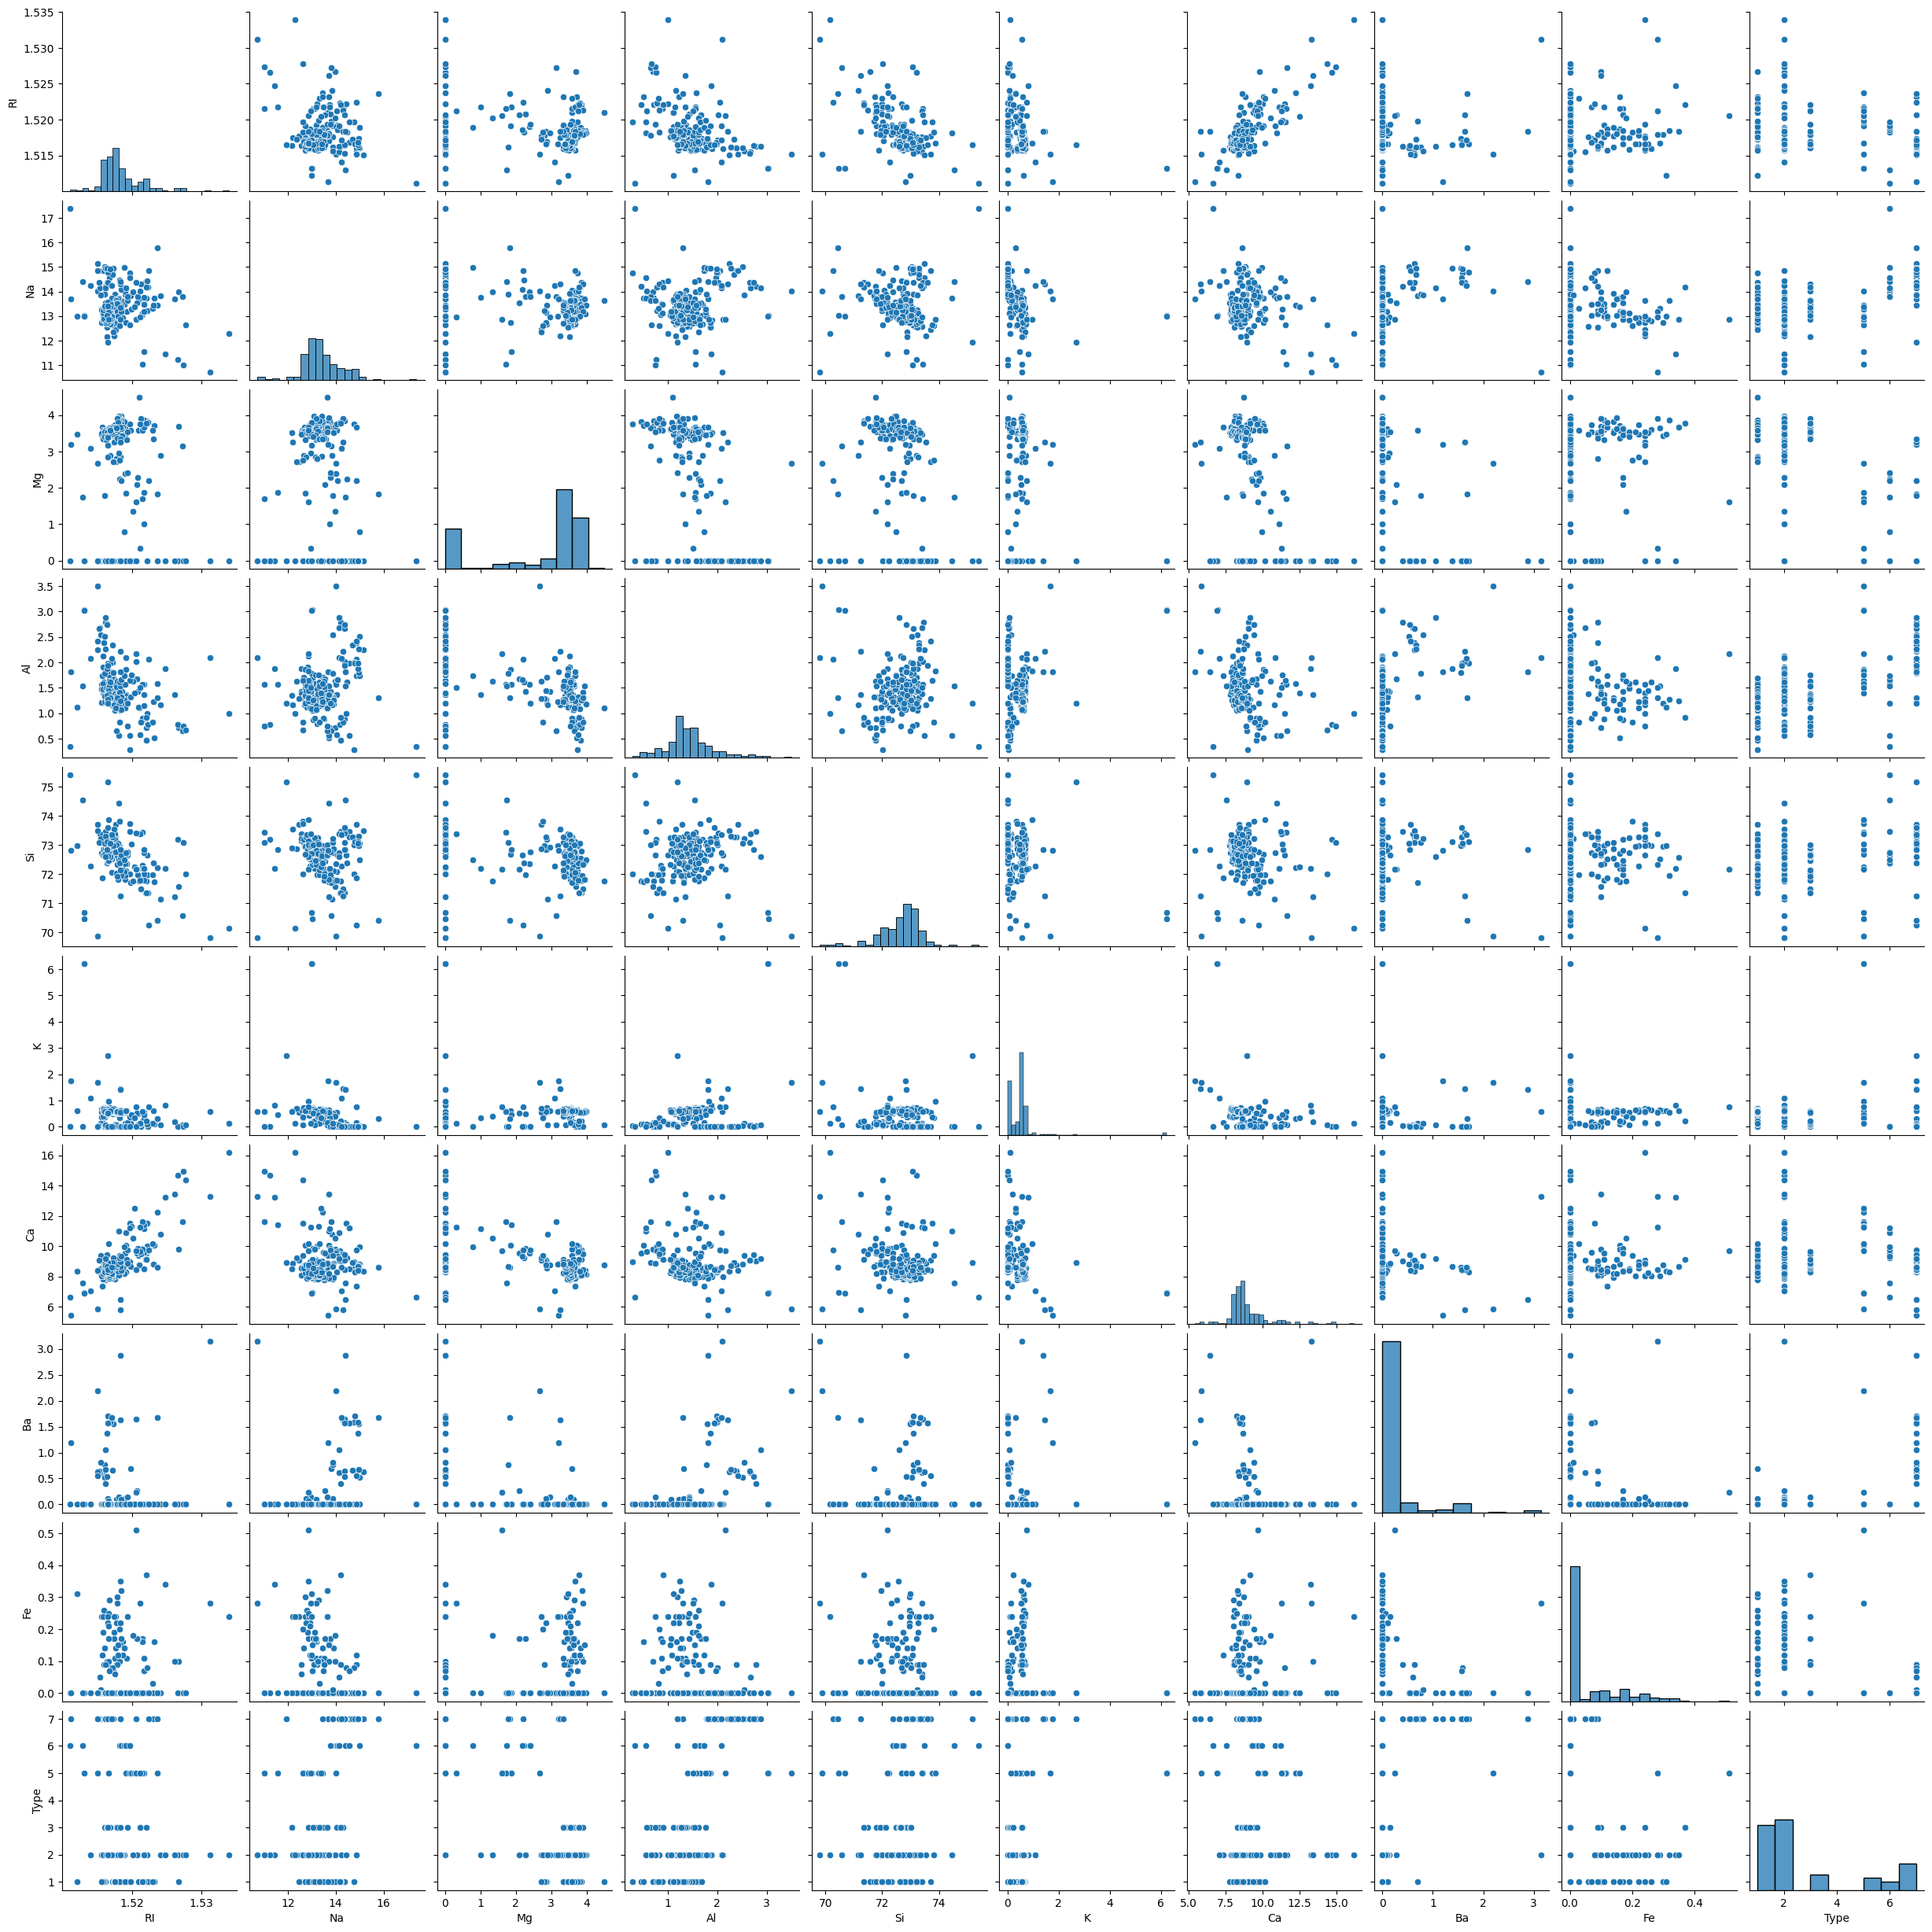

In [12]:
sns.pairplot(glasses)

<Axes: >

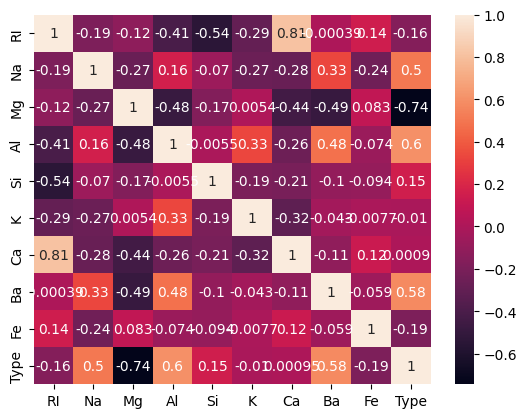

In [13]:
sns.heatmap(glasses.corr(), annot=True)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)


In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7846153846153846
              precision    recall  f1-score   support

           1       0.74      0.95      0.83        21
           2       0.83      0.65      0.73        23
           3       1.00      0.40      0.57         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       0.89      0.89      0.89         9

    accuracy                           0.78        65
   macro avg       0.80      0.77      0.76        65
weighted avg       0.81      0.78      0.78        65

Confusion Matrix:
 [[20  1  0  0  0  0]
 [ 4 15  0  2  1  1]
 [ 3  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]


In [17]:
import pandas as pd

feat_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)
print("Feature Importances:\n", feat_imp)



Feature Importances:
 Mg    0.172620
Al    0.155660
RI    0.147055
Ca    0.136843
Na    0.120964
K     0.103220
Ba    0.084198
Si    0.079440
dtype: float64


In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
scores = cross_val_score(bag, x, y, cv=5)
print("Bagging accuracy:", scores.mean())


Bagging accuracy: 0.6545957918050942


In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
scores = cross_val_score(boost, x, y, cv=5)
print("Boosting accuracy:", scores.mean())


Boosting accuracy: 0.4717607973421926


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# genre matrix
tfidf = TfidfVectorizer(tokenizer=lambda s: s.split('|'), lowercase=False)
genre_matrix = tfidf.fit_transform(glasses)


In [25]:
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

indices = glasses.drop_duplicates()

def recommend_anime(title, topn=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:topn+1]
    rec_idx = [i[0] for i in sim_scores]
    return glasses.iloc[rec_idx]


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Simplest form: for each user, create ground truth and predicted binary vectors over all anime
# Then compute average precision, recall, F1 across users

print("f1 score", f1_score(y_test, y_pred, average='weighted'))
print("precision score", precision_score(y_test, y_pred, average='weighted'))
print("recall score", recall_score(y_test, y_pred, average='weighted'))


f1 score 0.7757616367372464
precision score 0.8057264957264957
recall score 0.7846153846153846


# **1**
Collaborative Filtering (CF) is a recommendation technique that uses the behavior and preferences of many users to suggest items to an individual user It assumes people who agreed in the past will continue to agree (e.g., users with similar ratings likely share future preferences)


# **2**

build user item matrix with explicit rating or implicite feedback

compute similarities is item is similar or not

make recomendations for user based and find neighbors recomended their liked items